## Preprocessing of Cleaned Data

#### Import Cleaned Data

In [2]:
# Import standard libraries
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
import seaborn as sns 

In [3]:
# Read data and convert to a dataframe
obesity = pd.read_csv(r'../data/clean_data.csv')

obesity.describe()

,Age,Height,Weight,Freq_Veg,Num_Meals,Water_Intake,Phys_Activity,Tech_Use
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Feature columns with categorical values by type:

- Binary values:  'Gender', 'Family_History', 'High_Cal_Foods_Frequently', 'Smoke'

- Categorical string values:  'Snacking', 'Calorie_Monitoring', 'Freq_Alcohol', 'Transportation'

Feature columns with numerical values:

- Continous float values: 'Age',  'Height', 'Weight', 'Freq_Veg', 'Num_Meals', 'Phys_Activity', 'Tech_Use',  'Water_Intake'

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Feature columns by preprocessing type: categorical, or continous

cat_cols = ['Gender', 'Family_History', 'High_Cal_Foods_Frequently', 'Snacking','Smoke', 'Calorie_Monitoring', 'Freq_Alcohol', 'Transportation']

num_cols = ['Age', 'Height', 'Weight', 'Freq_Veg', 'Num_Meals','Water_Intake', 'Phys_Activity', 'Tech_Use']

### Column Transformers

1. Column Transformer using OneHotEncoding and Standard Scaler

In [5]:
preproc_1 = ColumnTransformer([('one_hot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                             ('standard', StandardScaler(), num_cols)])

preproc_1

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Family_History',
                                  'High_Cal_Foods_Frequently', 'Snacking',
                                  'Smoke', 'Calorie_Monitoring', 'Freq_Alcohol',
                                  'Transportation']),
                                ('standard', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'Freq_Veg',
                                  'Num_Meals', 'Water_Intake', 'Phys_Activity',
                                  'Tech_Use'])])

2. Columng Transformer Using OneHotEncoding and Robust Scaler

In [6]:
preproc_2 = ColumnTransformer([('one_hot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                             ('robust', RobustScaler(), num_cols)])
preproc_2

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Family_History',
                                  'High_Cal_Foods_Frequently', 'Snacking',
                                  'Smoke', 'Calorie_Monitoring', 'Freq_Alcohol',
                                  'Transportation']),
                                ('robust', RobustScaler(),
                                 ['Age', 'Height', 'Weight', 'Freq_Veg',
                                  'Num_Meals', 'Water_Intake', 'Phys_Activity',
                                  'Tech_Use'])])

### Compare StandardScaler and RobustScaler

Comparing distributions of "Freq_Veg", "Num_Meals", and "Age" using Standardscaler versus RobustScaler

- Create Standard Scaler

In [7]:
# dataframe with only numerical columns
obesity_nums= obesity[['Age', 'Height', 'Weight', 'Freq_Veg', 'Num_Meals','Water_Intake', 'Phys_Activity', 'Tech_Use']]

# Create standard scaler and fit numerical data
std_scaler=StandardScaler()
std_scaler.fit(obesity_nums)

scaled_df_np = std_scaler.transform(obesity_nums)
scaled_df = pd.DataFrame(scaled_df_np, columns=obesity_nums.columns)

# Print reults
scaled_df.describe()


,Age,Height,Weight,Freq_Veg,Num_Meals,Water_Intake,Phys_Activity,Tech_Use
count,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03
mean,-1.634214e-16,8.851994e-16,-5.447381e-17,-5.447381e-16,1.736353e-16,4.085536e-16,2.587506e-16,-1.089476e-16
std,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00
min,-1.625984e+00,-2.712155e+00,-1.827745e+00,-2.658892e+00,-2.225418e+00,-1.652172e+00,-1.186977e+00,-1.090505e+00
25%,-6.968683e-01,-7.781538e-01,-7.966038e-01,-7.883642e-01,-4.856048e-03,-6.804829e-01,-1.041062e+00,-1.090505e+00
50%,-2.364389e-01,-1.170116e-02,-1.435055e-01,-4.713949e-02,3.909061e-01,-7.809793e-03,-1.501506e-02,-5.290961e-02
75%,2.586523e-01,7.172047e-01,8.080017e-01,1.082164e+00,3.909061e-01,7.587794e-01,7.796945e-01,5.542111e-01
max,5.755509e+00,2.976762e+00,3.289772e+00,1.082164e+00,1.699068e+00,1.636552e+00,2.328908e+00,2.198928e+00


- Create Robust Scalers

In [ ]:
robust_scaler = RobustScaler()

robust_scaler.fit(obesity_nums)

robust_np = robust_scaler.transform(obesity_nums)
robust_df = pd.DataFrame(robust_np, columns=obesity_nums.columns)

robust_df.describe()

,Age,Height,Weight,Freq_Veg,Num_Meals,Water_Intake,Phys_Activity,Tech_Use
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.247445,0.007825,0.089433,0.025201,-0.987730,0.005426,0.008247,0.032169
std,1.046801,0.668896,0.623356,0.534737,2.527375,0.694967,0.549354,0.608153
min,-1.454229,-1.805890,-1.049629,-1.396265,-6.610849,-1.142503,-0.643668,-0.630866
25%,-0.481862,-0.512554,-0.407015,-0.396265,-1.000000,-0.467374,-0.563528,-0.630866
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.518138,0.487446,0.592985,0.603735,0.000000,0.532626,0.436472,0.369134
max,6.270873,1.998493,2.139640,0.603735,3.305425,1.142503,1.287335,1.369134


In [ ]:
# Create RobustScaler with_centering=False
# i.e. do not center the data before scaling
robust_scaler_2 = RobustScaler(with_centering=False)

robust_scaler_2.fit(obesity_nums)

robust_np_2 = robust_scaler_2.transform(obesity_nums)
robust_df_2 = pd.DataFrame(robust_np_2, columns=obesity_nums.columns)

In [83]:
# Create RobustScaler with unit_variance True
robust_scaler_3 = RobustScaler(unit_variance=True)

robust_scaler_3.fit(obesity_nums)

robust_np_3 = robust_scaler_3.transform(obesity_nums)
robust_df_3 = pd.DataFrame(robust_np_3, columns=obesity_nums.columns)

In [84]:
# Create RobustScaler with_centering False, and unit_variance True
robust_scaler_4 = RobustScaler(with_centering=False, unit_variance=True)

robust_scaler_4.fit(obesity_nums)

robust_np_4 = robust_scaler_4.transform(obesity_nums)
robust_df_4 = pd.DataFrame(robust_np_4, columns=obesity_nums.columns)

Histogram Comparisons

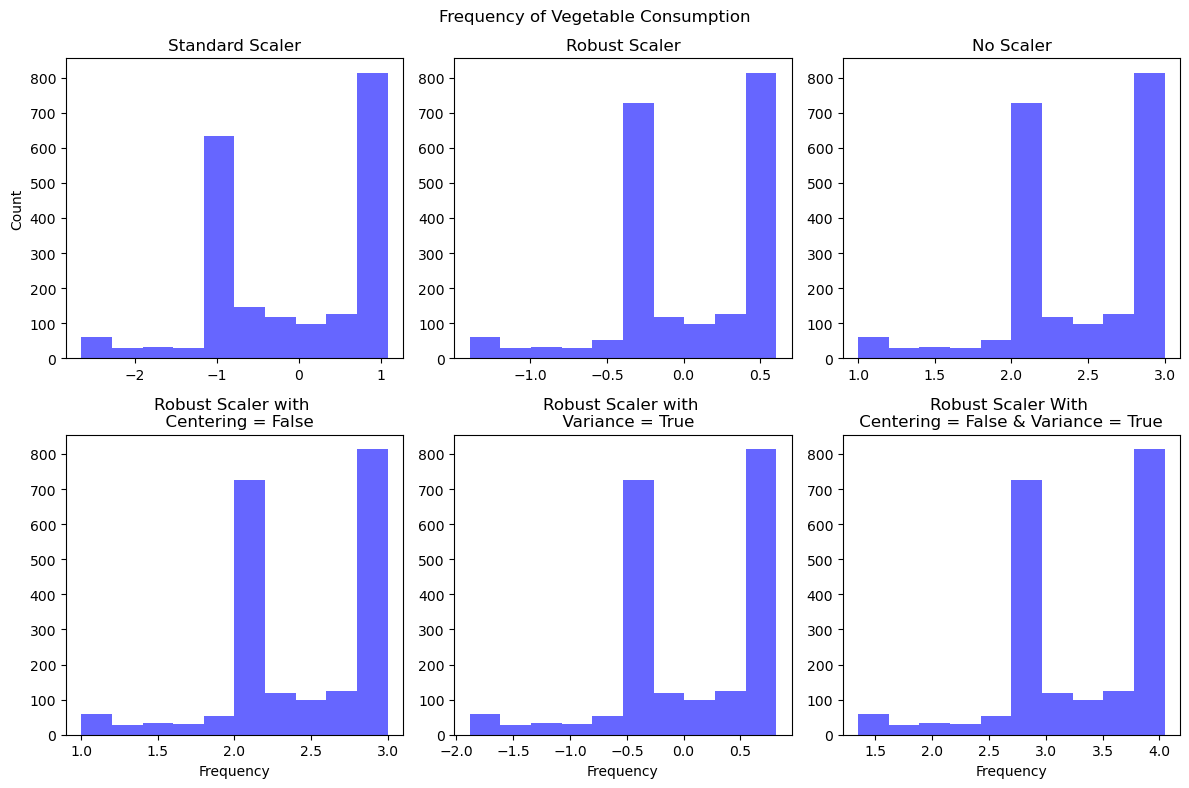

In [91]:
# Frequency of vegetable consumption- scaler comparison

x_1 = scaled_df['Freq_Veg'] 
x_2 = robust_df['Freq_Veg'] 
x_3 = obesity['Freq_Veg']

x_4 = robust_df_2['Freq_Veg']
x_5 = robust_df_3['Freq_Veg']
x_6 = robust_df_4['Freq_Veg']


def graphs(x_1, x_2, x_3, x_4, x_5, x_6, title):
    fig, axs = plt.subplots(2, 3, figsize=(12, 8)) 

    fig.suptitle(title)

    axs[0][0].set_title('Standard Scaler') 
    axs[0][0].hist(x_1, bins=10, color='blue', alpha=0.6) 
    axs[0][0].set_ylabel('Count') 

    axs[0][1].set_title('Robust Scaler') 
    axs[0][1].hist(x_2, bins=10, color='blue', alpha=0.6) 
   

    axs[0][2].set_title("No Scaler")
    axs[0][2].hist(x_3, bins=10, color='blue', alpha=0.6)
  
    axs[1][0].set_title('Robust Scaler with \n  Centering = False') 
    axs[1][0].hist(x_4, bins=10, color='blue', alpha=0.6) 
    axs[1][0].set_xlabel('Frequency') 

    axs[1][1].set_title('Robust Scaler with \n  Variance = True') 
    axs[1][1].hist(x_5, bins=10, color='blue', alpha=0.6) 
    axs[1][1].set_xlabel('Frequency') 

    axs[1][2].set_title('Robust Scaler With \n Centering = False & Variance = True ') 
    axs[1][2].hist(x_6, bins=10, color='blue', alpha=0.6) 
    axs[1][2].set_xlabel('Frequency') 
    return plt.tight_layout()

graphs(x_1, x_2, x_3, x_4, x_5, x_6, 'Frequency of Vegetable Consumption')

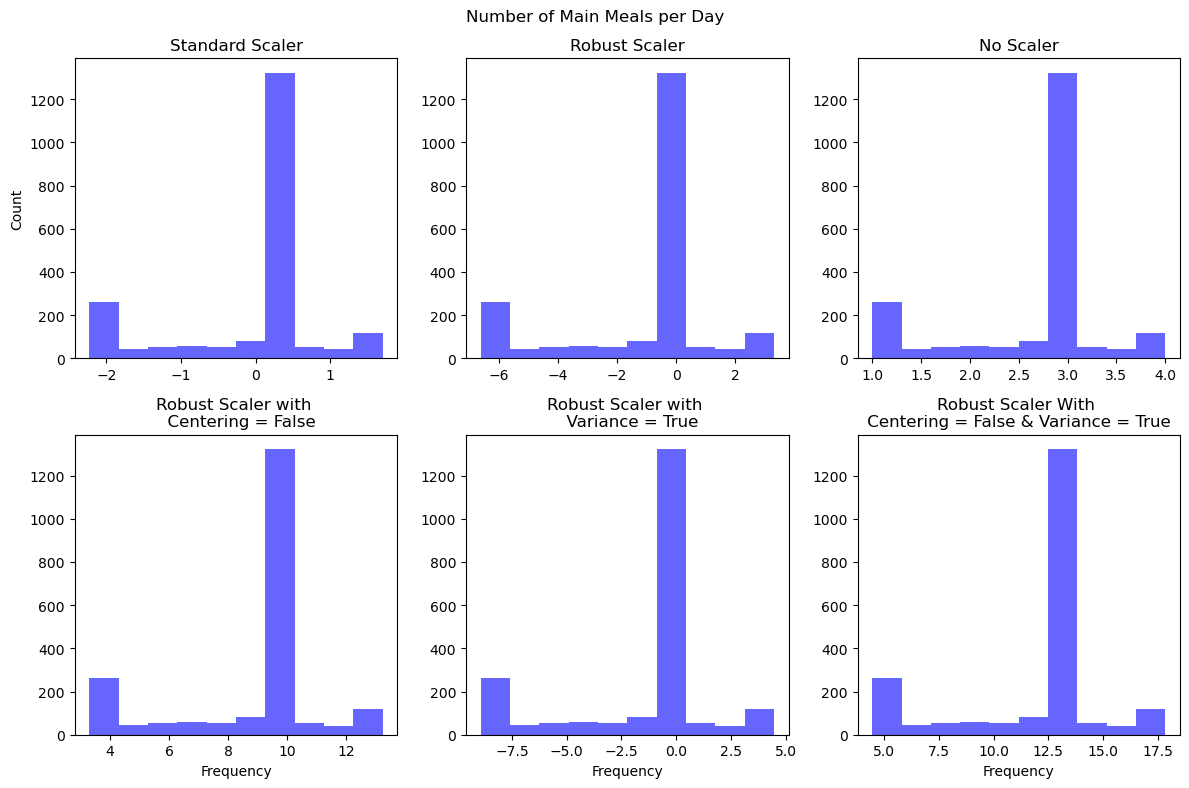

In [92]:
# Number of Meals per day - scaler comparison
x_1 = scaled_df['Num_Meals'] 
x_2 = robust_df['Num_Meals']
x_3 = obesity['Num_Meals'] 

x_4 = robust_df_2['Num_Meals']
x_5 = robust_df_3['Num_Meals']
x_6 = robust_df_4['Num_Meals']

graphs(x_1, x_2, x_3, x_4, x_5, x_6, 'Number of Main Meals per Day')

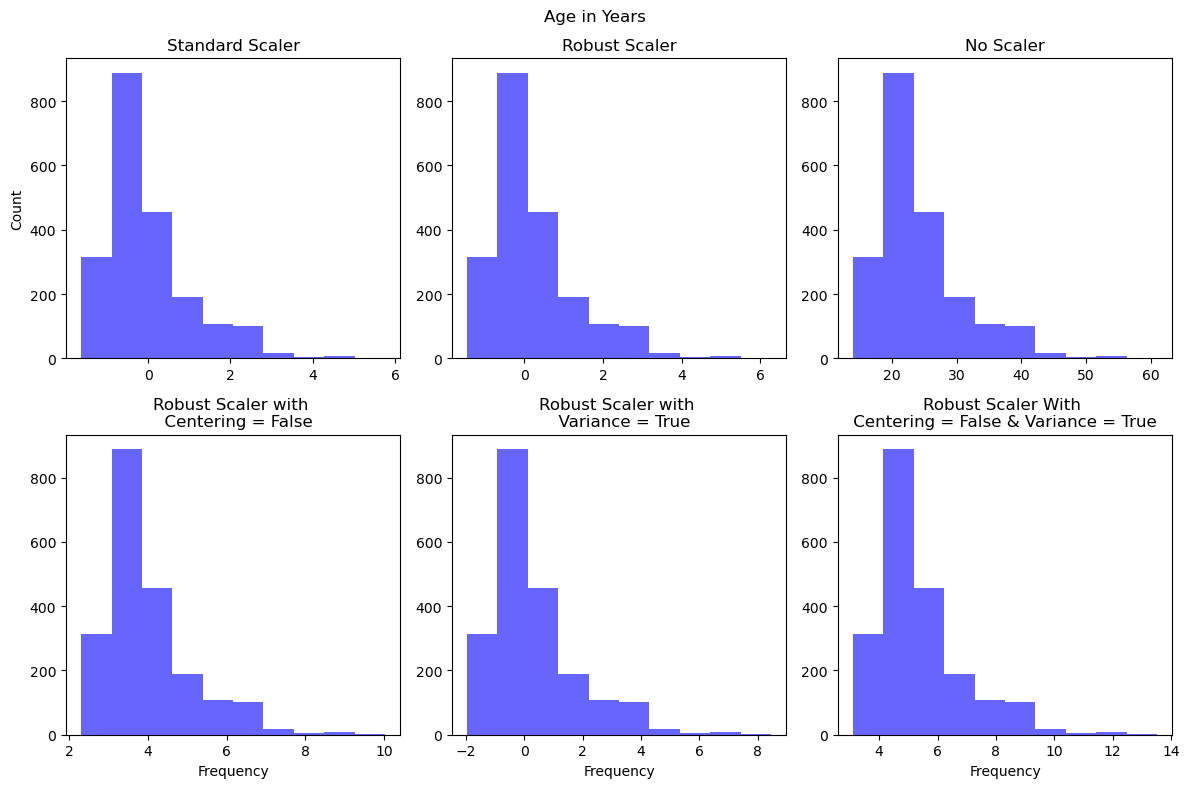

In [93]:
# Age - scaler comparison
x_1 = scaled_df['Age'] 
x_2 = robust_df['Age'] 
x_3 = obesity['Age']

x_4 = robust_df_2['Age']
x_5 = robust_df_3['Age']
x_6 = robust_df_4['Age']

graphs(x_1, x_2, x_3, x_4, x_5, x_6, 'Age in Years')